# Test Function: Bartels-Conn

## Description
The global minimum of the Bartels-Conn function is in a central elliptical valley with discontinuities appearing at all points along the descent direction. 

$$
f(x_1, x_2) =  |x_1^2 + x_2^2 + x_1 x_2| + |\sin(x_1)| + |\cos(x_2)|
$$

Global minimum is located at $x^* = f(0, 0)$ and $f(x^*) = 1$.

## Classification
* Continuous
* Non-Differentiable
* Non-Separable
* Non-Scalable
* Multimodal

## References
> Momin Jamil and Xin-She Yang, A literature survey of benchmark functions for global optimization problems, Int. Journal of Mathematical Modelling and Numerical Optimisation, Vol. 4, No. 2, pp. 150–194 (2013). DOI: 10.1504/IJMMNO.2013.055204

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pyvista as pv

%matplotlib inline

## Test Function and Surface Generation

In [2]:
def bartels_conn(x):
    """
    bartels_conn evaluates Bartels-Conn function at vector x

    Parameters
    ----------
    x : array
        x is a 2-dimensional vector, [x1, x2]

    Returns
    -------
    float
        scalar result
    """
    a = np.abs(x[0]**2 + x[1]**2 + x[0]*x[1])
    b = np.abs(np.sin(x[0]))
    c = np.abs(np.cos(x[1]))
    return a + b +c


def surface(fx, start=-30, stop=30, num=60):
    """
    surface evaluates fx at regularly spaced grid of points

    Parameters
    ----------
    fx : func
        fx is a vector valued function that returns a scalar result
    start : float
        lower bound of the coordinate grid
    stop : float
        upper bound of the coordinate grid
    num : int
        number of points along one dimension of the grid

    Returns
    -------
    array
        2D array formed by evaluating fx at each grid point
    """
    x = np.linspace(start=start, stop=stop, num=num)
    x1, x2 = np.meshgrid(x, x, indexing='ij')
    X = np.vstack((x1.ravel(), x2.ravel()))
    z = np.apply_along_axis(fx, 0, X).reshape(num,num)
    return x1, x2, z


x1, x2, z = surface(bartels_conn, start=-5, stop=5, num=500)
print(np.min(z), np.max(z), np.mean(z), z.shape)

1.0100700734319414 76.24258646012636 17.99837977238492 (500, 500)


## Normalization Functions

Working with normalized z-values improves the rendered surface. Compute some different variations for trial-and-error use below.

In [3]:
def minmax(z):
    """
    minmax returns the min-max normalized form of z
    """
    return (z-z.min())/(z.max()-z.min())


zminmax = minmax(z)
zlog1p = minmax(np.log1p(z))

## Contour Plots

* Filled contour.
* Full scale.
* Perceptually uniform colormap.

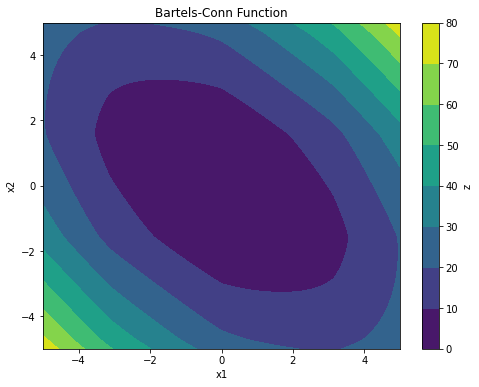

In [4]:
fig = plt.figure(figsize=(8,6))
plt.contourf(x1, x2, z, cmap='viridis')
plt.title('Bartels-Conn Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='z')
plt.show()

* Contour line.
* Full scale.
* Perceptually uniform colormap.

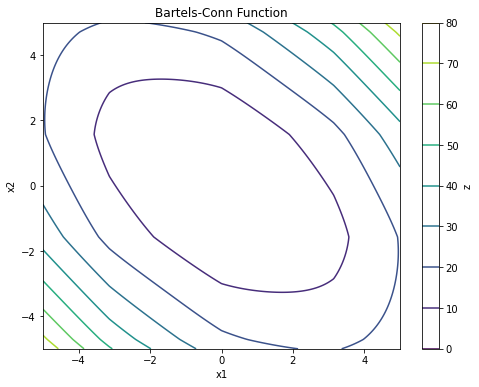

In [5]:
fig = plt.figure(figsize=(8,6))
plt.contour(x1, x2, z, cmap='viridis')
plt.title('Bartels-Conn Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='z')
plt.show()

## 3D Surface Plots: matplotlib

* Surface plot.
* Full scale.
* Perceptually uniform colormap.

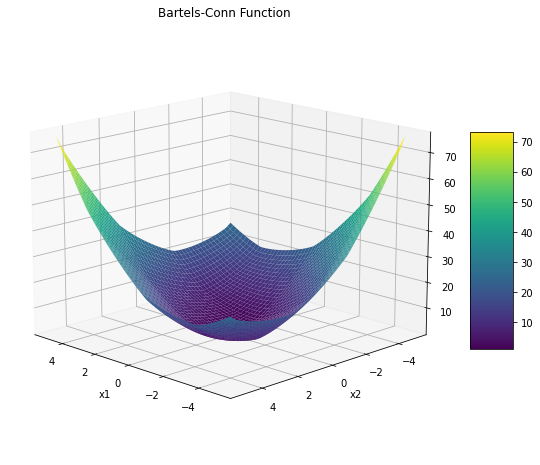

In [6]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.view_init(elev=15., azim=135.)
surf = ax.plot_surface(x1, x2, z, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Bartels-Conn Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

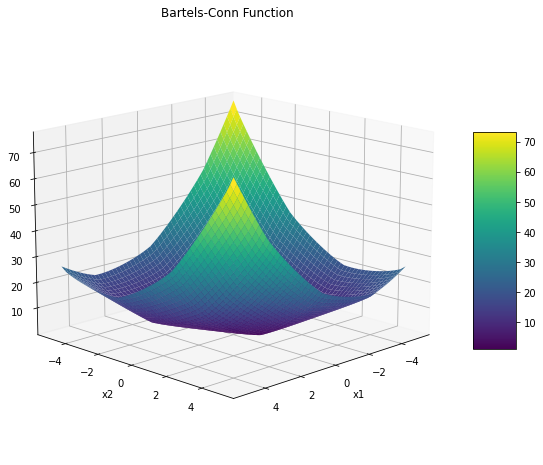

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.view_init(elev=15., azim=45.)
surf = ax.plot_surface(x1, x2, z, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Bartels-Conn Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 3D Surface Plots: pyvista

Create a surface mesh.

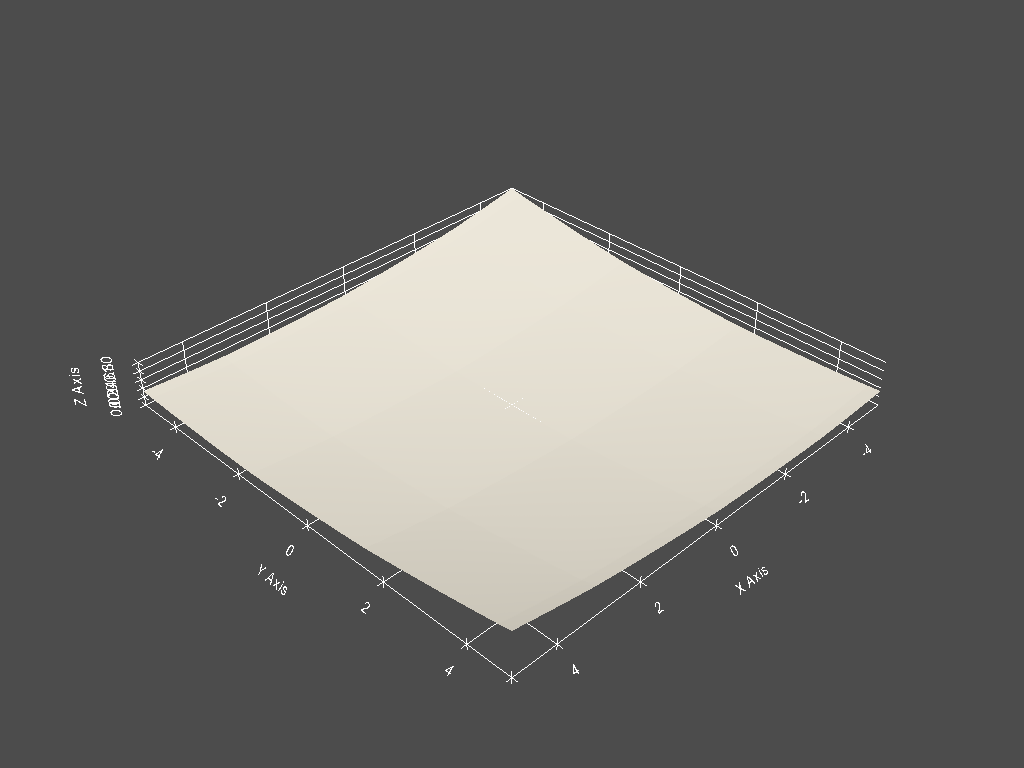

StructuredGrid,Information
N Cells,249001
N Points,250000
X Bounds,"-5.000e+00, 5.000e+00"
Y Bounds,"-5.000e+00, 5.000e+00"
Z Bounds,"0.000e+00, 1.000e+00"
Dimensions,"500, 500, 1"
N Arrays,0


In [8]:
grid = pv.StructuredGrid(x1, x2, zminmax)
grid.plot(show_grid=True)
grid

In [9]:
grid['scalars'] = z.flatten("F")
grid

StructuredGrid (0x7feb10c5ea08)
  N Cells:	249001
  N Points:	250000
  X Bounds:	-5.000e+00, 5.000e+00
  Y Bounds:	-5.000e+00, 5.000e+00
  Z Bounds:	0.000e+00, 1.000e+00
  Dimensions:	500, 500, 1
  N Arrays:	1

Repeat the surface plot based on the attached scalars.

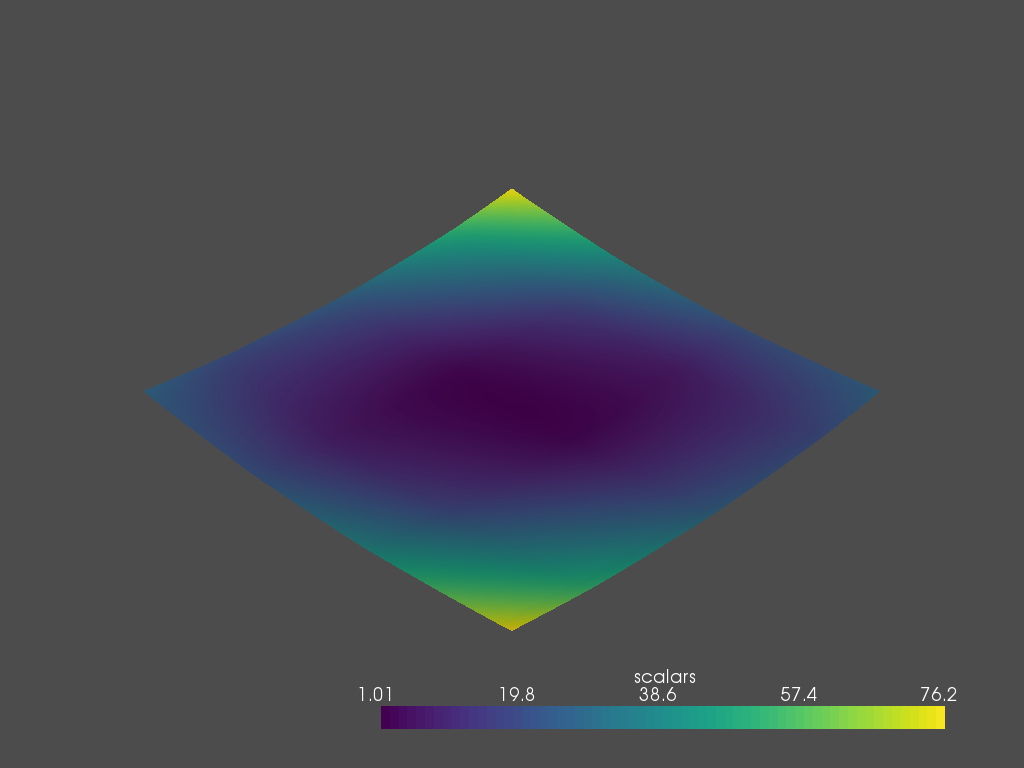

In [10]:
p = pv.Plotter()
p.add_mesh(grid, cmap='viridis')
p.show()

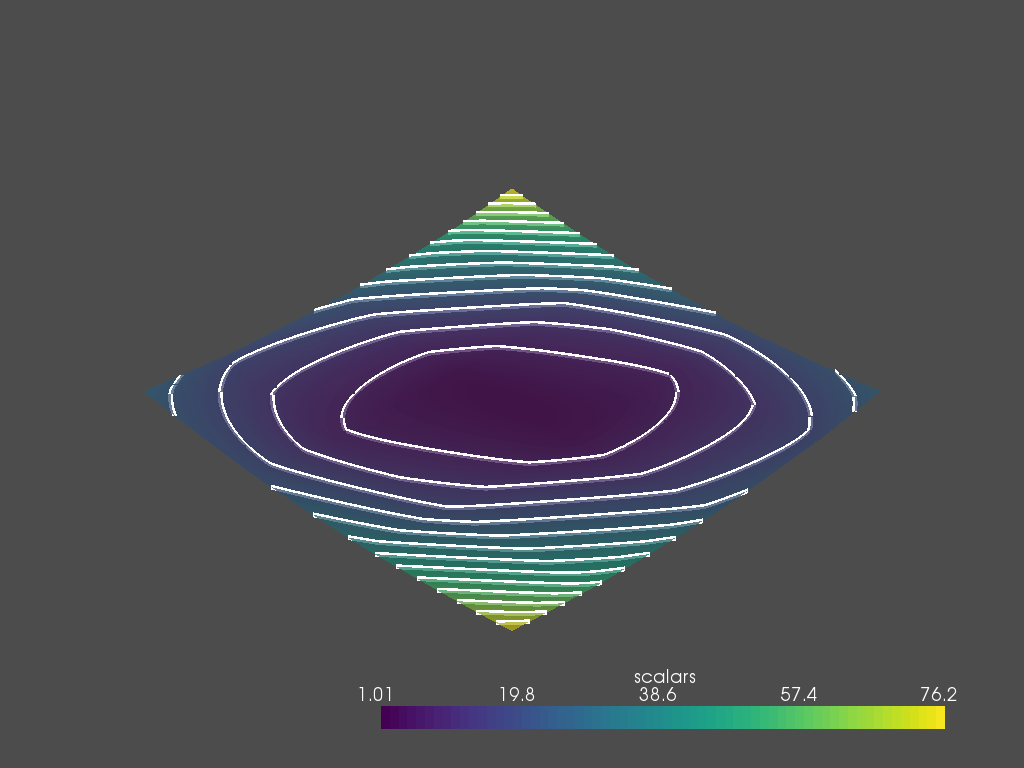

PolyData (0x7feac22cae28)
  N Cells:	9846
  N Points:	9870
  X Bounds:	-5.000e+00, 5.000e+00
  Y Bounds:	-5.000e+00, 5.000e+00
  Z Bounds:	7.143e-02, 9.286e-01
  N Arrays:	1

In [11]:
contours = grid.contour(isosurfaces=15)

p = pv.Plotter()
p.add_mesh(grid, opacity=0.75, cmap='viridis')
p.add_mesh(contours, color="white", line_width=5)
p.show()
contours